<a href="https://colab.research.google.com/github/ebnamusab/ML-in-image-processing/blob/main/ML%20in%20image%20processing_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier


In [2]:

#importing the dataset using the pandas read_csv method
df = pd.read_csv('/content/fashion-mnist_train.csv')

# Deep dive into the columns of the dataset
df.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,2,0,0,0,0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Looking into the shape of the mnist dataset
df.shape


(3311, 785)

In [4]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
df = df.sample(frac=0.3).reset_index(drop=True)

df.shape

(993, 785)

# New Section

In [6]:
# LOOKUP is a dictionary mapping the class labels to their respective names
LOOKUP = {
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}




In [7]:
# defining a function display function which on calling will display the actual label of the image
def display_image(features, actual_label):
    print("Actual label: ", LOOKUP[actual_label])
    plt.imshow(features.reshape(28,28))

In [8]:
# Splitting the df dataframe into two variable X and y where y contains the label column and X all the rest column
X = df[df.columns[1:]]  # Assuming the first column is 'label' and rest are features
y = df['label']

In [9]:
print(y)

0      6
1      2
2      6
3      4
4      3
      ..
988    1
989    0
990    2
991    5
992    9
Name: label, Length: 993, dtype: int64


In [10]:
print(X)

     pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0       0       0       0       0       0       3       0       0   
1         0       0       0       0       1       0       0       0       0   
2         0       0       0       0       0       0       0       0      38   
3         0       0       0       0       0       1       0       0       0   
4         0       0       0       0       0       2       1       0       0   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
988       0       0       0       0       0       0       0       0       0   
989       0       0       0       0       0       0       0       2       0   
990       0       0       0       0       0       0       0       0      47   
991       0       0       0       0       0       0       0       0       0   
992       0       0       0       0       0       0       0       0       0   

     pixel10  ...  pixel775  pixel776  pixel777  pi

In [11]:
X.loc[5].values

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  21.,
        86., 117., 128., 100.,  86.,  69.,   0.,   0.,   0.,   1.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   4.,   0.,  54., 234., 227., 225., 227., 224., 216.,
       241., 252.,  68.,   0.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 161.,
       253., 208., 212., 208., 216., 220., 200., 231.,  35.,   0.,   5.,
         1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   2.,   0.,   0., 169., 201., 185., 224., 226., 240.,
       230., 168., 174.,  89.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,  21., 161.,
       178., 193., 196., 200., 240., 249., 180., 180., 191., 201., 164.,
        70.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   2.,   0.,   6., 178., 186., 175., 16

In [12]:
y.loc[5]

4

Actual label:  Coat


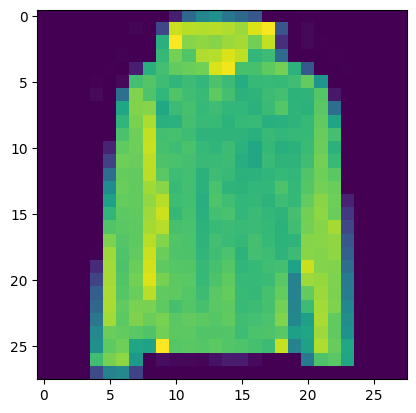

In [13]:
# Example of using display_image function with specific rows of the dataframe
display_image(X.loc[5].values, y.loc[5])



Actual label:  Trouser


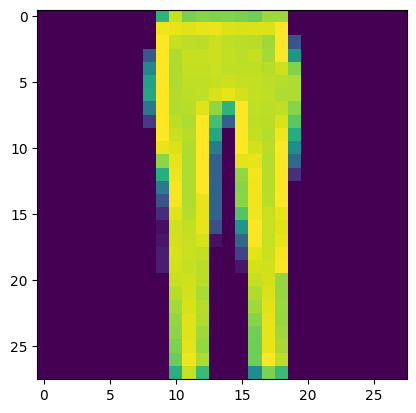

In [14]:
display_image(X.loc[600].values, y.loc[600])


In [15]:
# Normalizing the pixel values of images
X = X / 255.
X.head()# Example of using display_image function with specific rows of the dataframe

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.011765,0.0,0.00000,0.000000,...,0.635294,0.384314,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.003922,0.000000,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.270588,0.003922,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.14902,0.643137,...,0.109804,0.101961,0.000000,0.070588,0.000000,0.003922,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.003922,0.000000,0.0,0.00000,0.007843,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.007843,0.003922,0.0,0.00000,0.121569,...,0.490196,0.450980,0.333333,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [16]:
# Dividing the dataset into training and testing data using the sklearn library and test size as 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Now checking the shape of training and testing data
X_train.shape, y_train.shape

X_test.shape, y_test.shape

# defining a function for summarizing the classification of the prediction accuracy on various factors


# Please note that this is a continuation and depends on the context set by the previous blocks of code
# that you have provided


((199, 784), (199,))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77        22
           1       0.96      0.96      0.96        27
           2       0.80      0.84      0.82        19
           3       0.75      0.79      0.77        19
           4       0.78      0.70      0.74        20
           5       0.93      0.93      0.93        14
           6       0.57      0.50      0.53        24
           7       0.90      0.95      0.92        19
           8       0.95      0.95      0.95        19
           9       1.00      0.94      0.97        16

    accuracy                           0.83       199
   macro avg       0.84      0.84      0.84       199
weighted avg       0.83      0.83      0.83       199



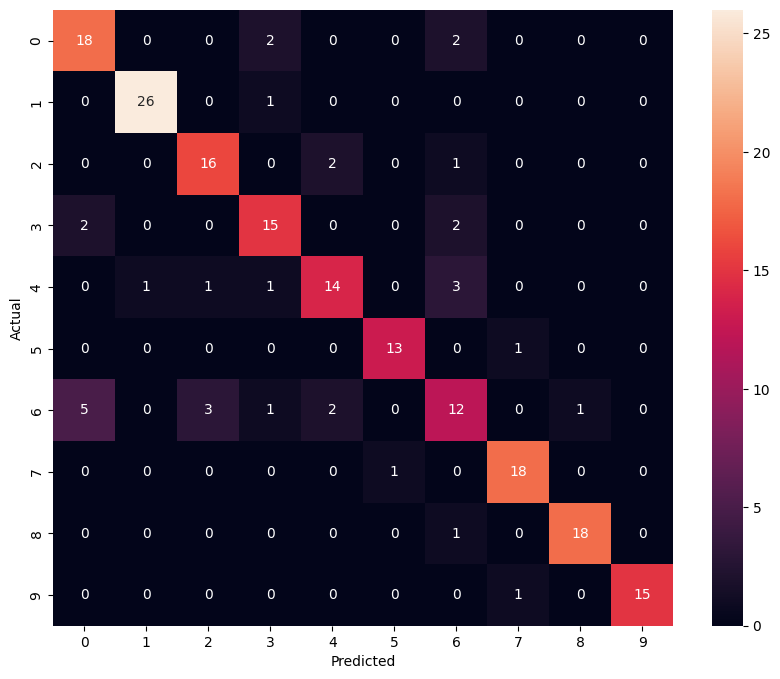

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Fit the logistic regression model
logistic_model = LogisticRegression(solver='sag', multi_class='auto', max_iter=10000)
logistic_model.fit(X_train, y_train)

# Predict using the model
y_pred = logistic_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [18]:
y_pred

array([7, 2, 9, 1, 8, 3, 7, 0, 4, 2, 4, 6, 8, 7, 4, 0, 5, 0, 7, 3, 8, 7,
       4, 6, 4, 0, 1, 7, 2, 3, 1, 4, 1, 3, 2, 2, 6, 6, 1, 9, 0, 9, 4, 2,
       5, 8, 7, 5, 8, 9, 1, 8, 6, 7, 3, 1, 0, 3, 3, 5, 3, 0, 1, 1, 8, 2,
       8, 2, 0, 9, 8, 9, 4, 0, 2, 6, 2, 8, 6, 6, 4, 9, 7, 5, 0, 1, 6, 9,
       6, 3, 3, 0, 3, 8, 1, 0, 4, 8, 1, 1, 1, 1, 6, 5, 2, 8, 8, 1, 1, 7,
       8, 4, 6, 7, 7, 6, 6, 5, 2, 6, 7, 5, 1, 3, 2, 0, 1, 0, 7, 2, 3, 2,
       0, 2, 5, 0, 0, 4, 4, 2, 9, 8, 5, 2, 0, 5, 7, 7, 3, 4, 0, 5, 6, 6,
       4, 5, 1, 9, 4, 6, 3, 1, 0, 3, 1, 1, 3, 4, 5, 7, 1, 7, 6, 3, 4, 8,
       7, 0, 8, 9, 3, 2, 8, 9, 9, 1, 3, 7, 6, 0, 0, 9, 6, 0, 1, 1, 0, 2,
       9])

In [19]:
from joblib import dump, load
from sklearn.linear_model import LogisticRegression

# Let's say you have trained a logistic regression model named `logistic_model`
# logistic_model = LogisticRegression().fit(X_train, y_train)

# Now to save the model to a file
dump(logistic_model, 'logistic_model.joblib')

# Later on, you can load the model back into memory with:
loaded_model = load('logistic_model.joblib')

# And then you can use loaded_model to make predictions
# predictions = loaded_model.predict(X_test)


In [21]:
# Initializing logistic regression with the 'sag' solver, multi_class set to 'auto', and a maximum of 10000 iterations


def summarize_classification(y_true, y_pred):
  """
  This function summarizes the classification of the prediction accuracy on various factors.

  Args:
      y_true: The true labels.
      y_pred: The predicted labels.
  """

  # Calculate the accuracy score
  accuracy = accuracy_score(y_true, y_pred)

  # Print the accuracy score
  print("Accuracy:", accuracy)

  # Calculate the confusion matrix
  confusion_matrix = confusion_matrix(y_true, y_pred)

  # Print the confusion matrix
  print("Confusion Matrix:")
  print(confusion_matrix)

  # Calculate the classification report
  classification_report = classification_report(y_true, y_pred)

  # Print the classification report
  print("Classification Report:")
  print(classification_report)
# logistic_model = LogisticRegression(solver='sag', multi_class='auto', max_iter=10000).fit(X_train, y_train)

# # Making prediction using the model we trained just above.
# y_pred = logistic_model.predict(X_test)
# y_pred

# # Summarizing the classification we have performed
# summarize_classification(y_test, y_pred)

# # This output is a printed summary from the summarize_classification function


### Answer these questions to get marks?

If you give a wrong answer you will still get full marks but dont copy from chatgpt will give you straight up zero
1.   Did you run all the codes ?
2.   In which code line we divided them into Y and X from the actual dataset? (just copy that code)
3.   Why did we divide the dataset into test and train?
4.   What doest y_pred represent in this code?
5.   what is the accuracy of your model?



### Write your answer here

1.   YES

2.   Splitting the df dataframe into two variable X and y where y contains the label column and X all the rest column
X = df[df.columns[1:]] .
Assuming the first column is 'label' and rest are features
y = df['label']

3. We divide the dataset into test and train to ensure that model learns well without memorizing the data and perform well in unaseen set

4. y_pred represents the predicted labels generated by the logistic regression model  

5. The accuracy of my model is 84.86%.

